In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
coindata = pd.read_csv("data/r76_events_coincidencepeak.txt", skiprows=3, engine='python',skipfooter=1,sep="*",skipinitialspace=True, \
            index_col=False, \
            names=['garbage','Row','SeriesNumber','EventNumber','PTOFdelay','pt_keVee'], \
            delim_whitespace=False)


print (coindata.head(10))
print (coindata.tail(10))


   garbage   Row  SeriesNumber  EventNumber  PTOFdelay    pt_keVee
0      NaN  1561   72209162200        20309         56   48.724426
1      NaN  2450   72209162200        30273         15  199.859146
2      NaN  3438   72209162200        40339         50   10.346083
3      NaN  4270   72209162200        50269         14   40.072876
4      NaN  5046   72209162200        60108         67   21.741763
5      NaN  5787   72209162200        60849         21   17.185294
6      NaN  5848   72209162200        70006         25  166.384586
7      NaN  6823   72209162200        80047          9  191.283417
8      NaN  7083   72209162200        80307         46   11.980396
9      NaN  8926   72209162200       100246         66   17.653014
      garbage      Row  SeriesNumber  EventNumber  PTOFdelay    pt_keVee
2313      NaN  1374581   72209172155      2020326         -6    5.112734
2314      NaN  1374846   72209172155      2020591         41   29.666429
2315      NaN  1375554   72209172155      20

In [3]:
series = np.asarray(coindata['SeriesNumber'])
ev = np.asarray(coindata['EventNumber'])
EkeV = np.asarray(coindata['pt_keVee'])
PTOFdelay = np.asarray(coindata['PTOFdelay'])

(-100.0, 100.0)

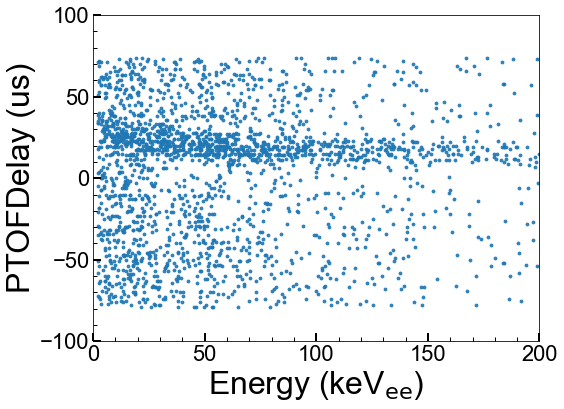

In [4]:
fig, axs = plt.subplots(1,1,figsize=(8,6))
# the ER-band fit
ax1 = axs




ax1.scatter(EkeV, PTOFdelay, marker='o', alpha=0.9, s=8)


# plot the data
#ax1.errorbar(ER_data['Erecoil'], ER_data['sigma'], yerr=ER_data['sigma_err'], fmt="o", label="data")


#ax1.plot(E_recoil_arr, sig_er_func(E_recoil_arr), label="Edelweiss ER resolution, C=0.0313")
ax1.set(xlabel="Energy (keV$_{\mathrm{ee}}$)", ylabel="PTOFDelay (us)")

    
plt.xlim(0, 200)
plt.ylim(-100,100)

In [5]:
print(np.shape(EkeV[PTOFdelay>0]))

(1498,)


In [6]:
cHE = (EkeV>50.0)

In [7]:
print(np.shape(EkeV[cHE]))

(1167,)


In [8]:
print(series[cHE])
print(ev[cHE])

[72209162200 72209162200 72209162200 ... 72209172155 72209172155
 72209172155]
[  30273   70006   80047 ... 2050570 2060142 2060345]


In [9]:
with open('data/r76-coinpeak-gt-50keV.txt', 'w') as f:
    for i,s in enumerate(series):
        if(cHE[i]):
          f.write('{} {}\n'.format(s,ev[i]))

In [10]:

qbins = np.linspace(-75,75,75)
n,nx = np.histogram(PTOFdelay[cHE],bins=qbins)
xcq = (qbins[:-1] + qbins[1:]) / 2

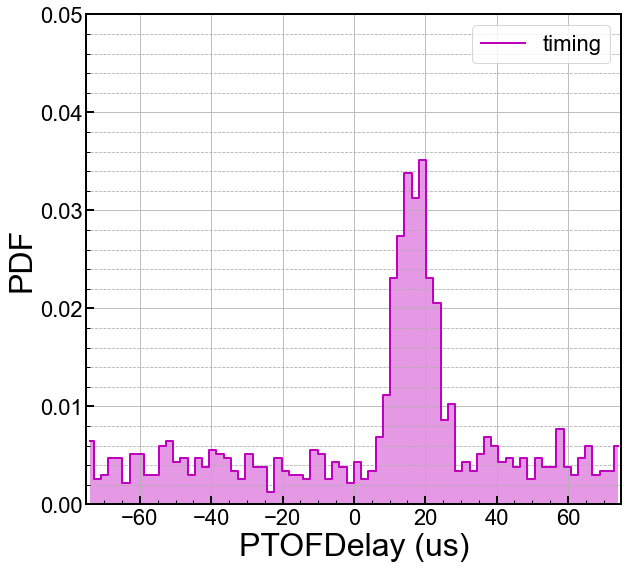

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


yhist = n/np.sum(n)/np.diff(xcq)[0]


#estring = r'${}\mathrm{{keV}}< E_r \leq {}\mathrm{{keV}}$'.format(Emin,Emax)
#print(estring)
ax1.step(xcq,yhist, where='mid',color='m', linestyle='-', \
            label='timing', linewidth=2)


ymin = 0.0
ymax = 0.05

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),yhist,step='mid',facecolor='m',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(-75, 75) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'PTOFDelay (us)')
ax1.set_ylabel('PDF')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()

In [12]:
qbins = np.linspace(-75,75,75)
n,nx = np.histogram(PTOFdelay,bins=qbins)
xcq = (qbins[:-1] + qbins[1:]) / 2

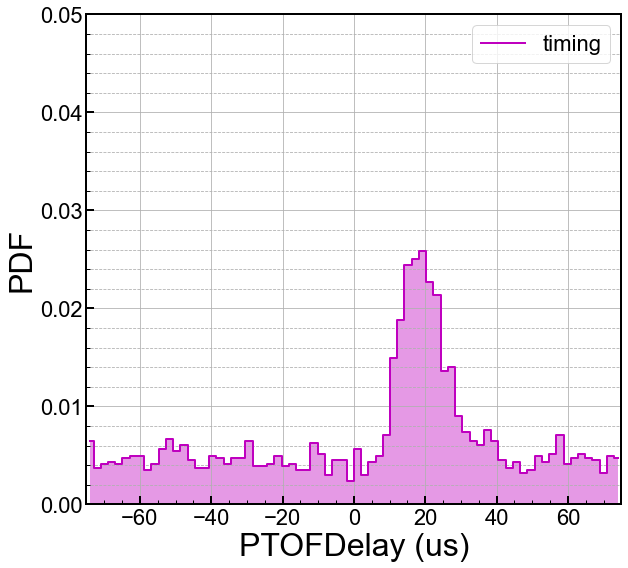

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


yhist = n/np.sum(n)/np.diff(xcq)[0]


#estring = r'${}\mathrm{{keV}}< E_r \leq {}\mathrm{{keV}}$'.format(Emin,Emax)
#print(estring)
ax1.step(xcq,yhist, where='mid',color='m', linestyle='-', \
            label='timing', linewidth=2)


ymin = 0.0
ymax = 0.05

blue = '#118DFA'
ax1.fill_between(xcq,np.zeros(np.shape(xcq)),yhist,step='mid',facecolor='m',alpha=0.4, \
                 label='')


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(-75, 75) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'PTOFDelay (us)')
ax1.set_ylabel('PDF')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/MSyieldHist_Figure3a.eps')
#plt.savefig('paper_figures/MSyieldHist_Figure3a.pdf')
plt.show()